# Error propagation

In [1]:
X_mean = 3.5

In [ ]:
X_mean

In [7]:
X_std = 0.4
M = int(1e4) # 1e4 = 10^4 = 10,000

In [8]:
# Import NumPy under the abbreviation 'np'
import numpy as np

[Numpy](https://https://numpy.org/)

In [9]:
np.random.normal?

In [ ]:
X = np.random.normal(X_mean, X_std, size=M)
X

In [ ]:
# example array
t=np.array([0,1,2,3,4,5,6,7,8,9])
C=np.array([0,1,4,9,16,25,36,49,64,81])
C

In [41]:
# Import the pyplot module of Matplotlib as plt
import matplotlib.pyplot as plt

In [ ]:
plt.hist(X, bins=50, alpha=0.7, edgecolor='black'); # normal distribution (X_mean = 3.5 & X_std = 0.6)

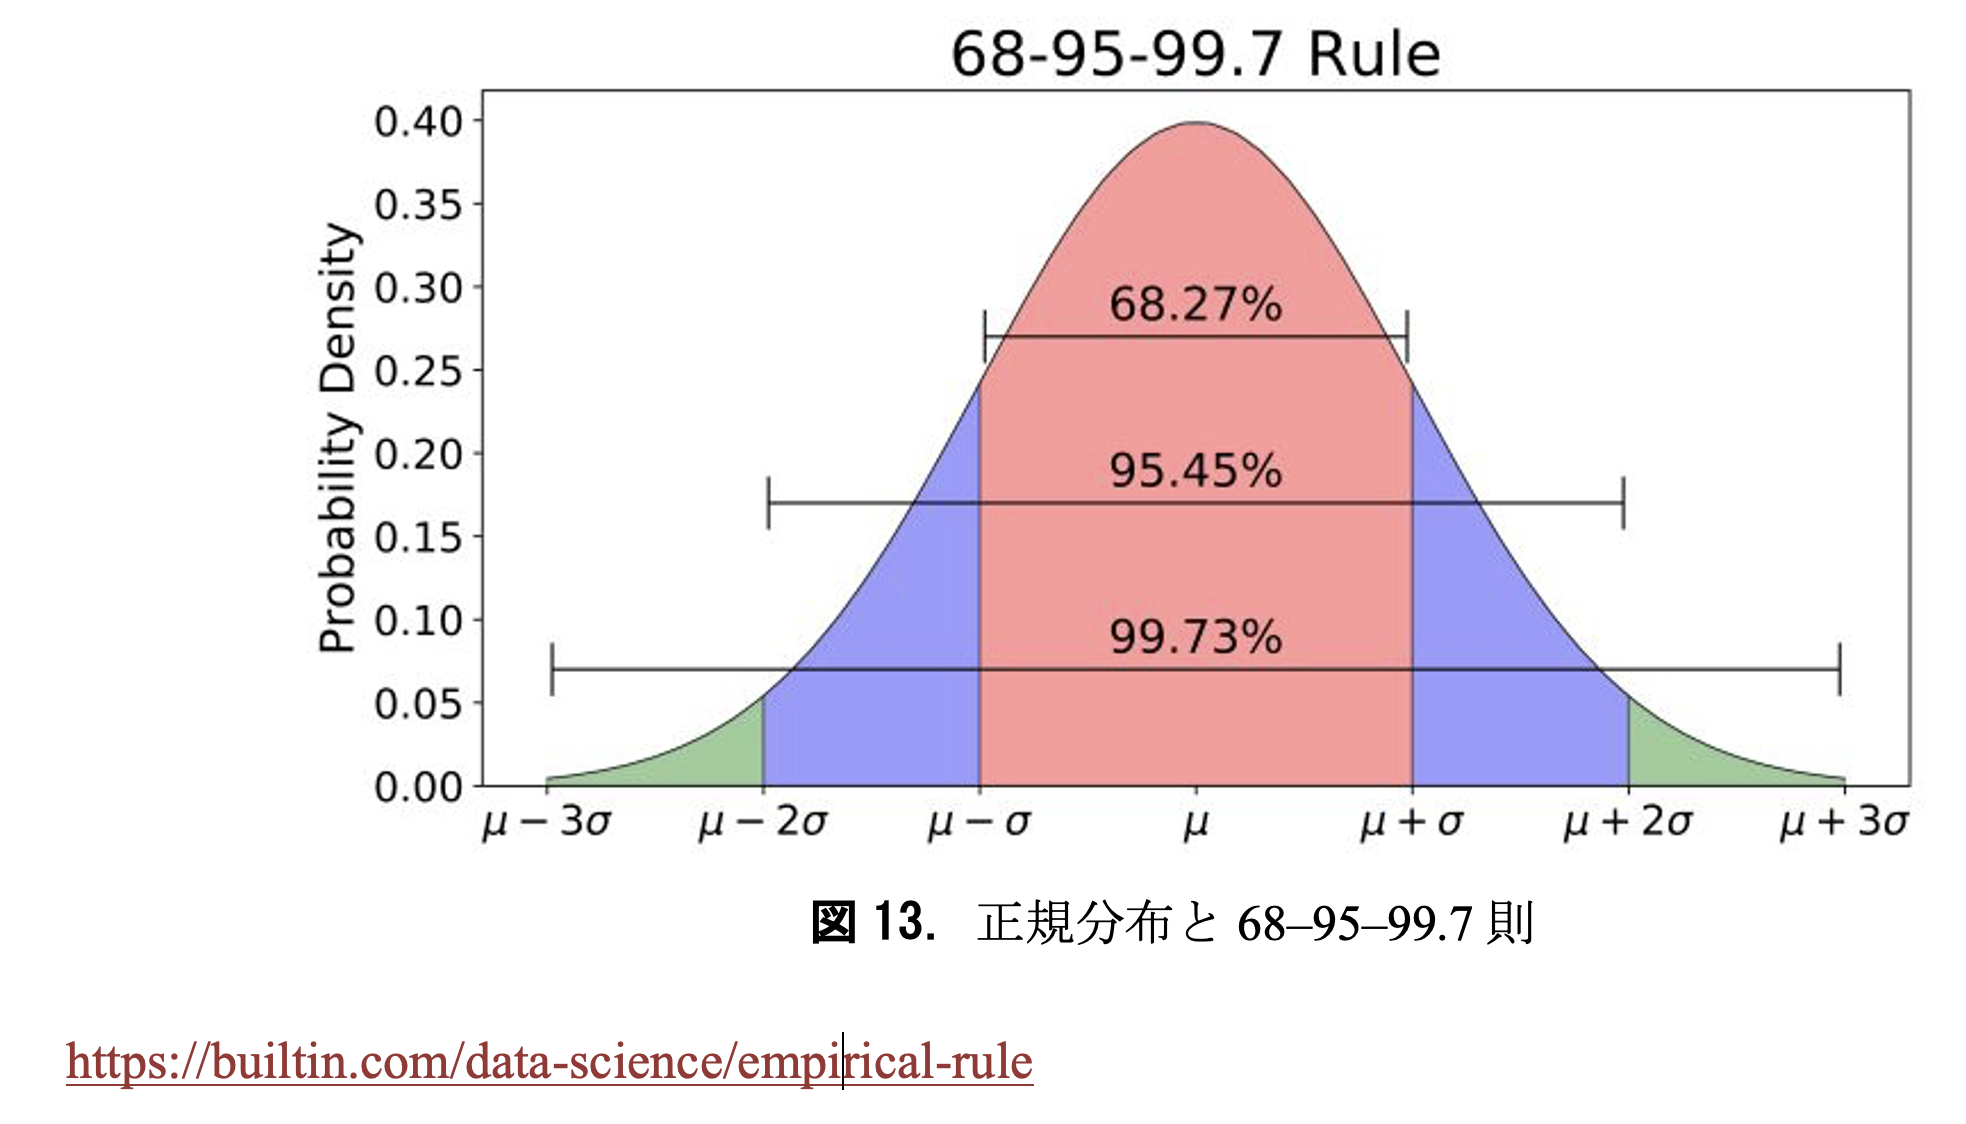

In [43]:
Y_mean = 6.0
Y_std = 0.6
Y = np.random.normal(Y_mean, Y_std, size=M)

In [ ]:
sum_result = X + Y
diff_result = X - Y

plt.hist(sum_result, bins=50, alpha=0.7, edgecolor='black')
plt.xlabel("X + Y")
plt.ylabel("Frequency")
plt.title("Histogram of X + Y")
plt.show()

std_sum = np.std(sum_result)
std_diff = np.std(diff_result)
std_analytical = np.sqrt(X_std**2 + Y_std**2)

print(f"Standard deviation of X + Y: {std_sum:.3f}")
print(f"Standard deviation of X - Y: {std_diff:.3f}")
print(f"Analytical standard deviation: {std_analytical:.3f}")

In [ ]:
plt.plot(t,C)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

t=np.linspace(0.64-.2, 0.64+0.2, 100)
h=2.0

def g(t,h):
    return 2*h/t**2

plt.plot(t, g(t,h))
plt.xlabel("t (sec)")
plt.ylabel("g (N/kg)")
plt.plot((0.64-0.02,0.64-0.02), (g(t[-1],h),g(0.64-0.02,h)), 'k-.')
plt.plot((0.64+0.02,0.64+0.02), (g(t[-1],h),g(0.64+0.02,h)), 'k-.')
plt.plot((0.64,0.64), (g(t[-1],h),g(0.64,h)), 'k:')
plt.plot((t[0],0.64-0.02), (g(0.64-0.02,h),g(0.64-0.02,h)), 'k-.')
plt.plot((t[0],0.64+0.02), (g(0.64+0.02,h),g(0.64+0.02,h)), 'k-.')
plt.plot((t[0],0.64), (g(0.64,h),g(0.64,h)), 'k:')
plt.grid()

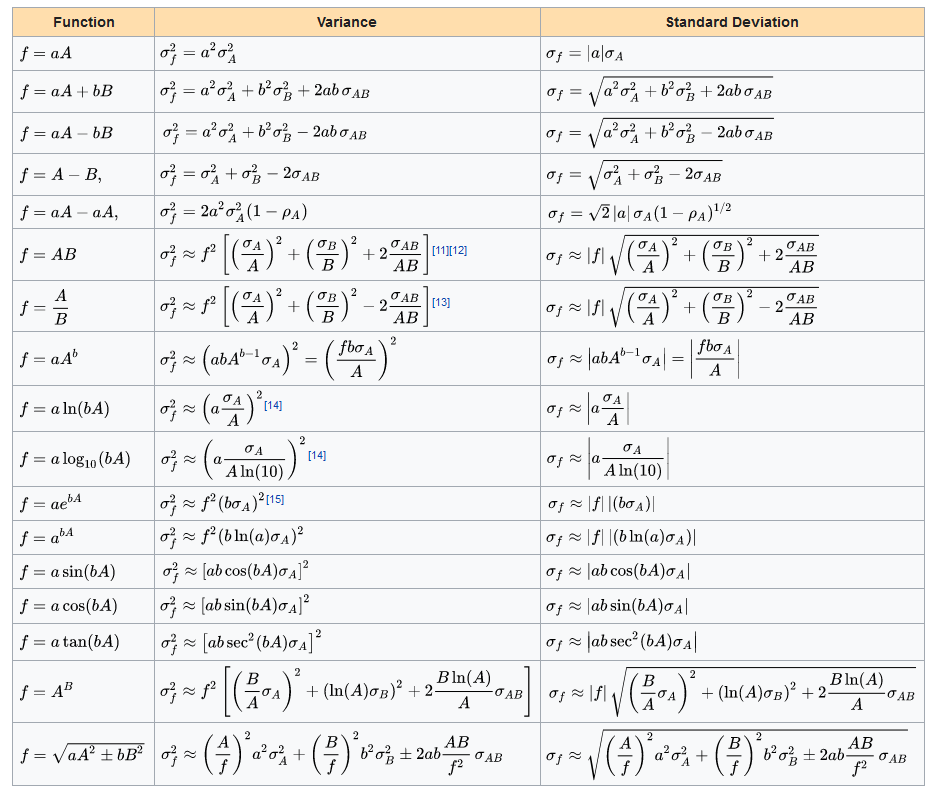

$$
\langle v\rangle=\frac{Q}{S}=\frac{4 Q}{\pi D^2}
$$

円管の内径($D=6.0\times10^{-3} \mathrm{~m}$), 空気の密度($\rho_{\mathrm{a}} = 1.2 \mathrm{~kg ~m^{-3}}$), 空気の粘度($\mu_{\mathrm{a}} = 1.8 \times 10^{-5} \mathrm{~kg ~m^{-3}}$)

流量$Q$の測定値
<font color=red>
$$
Q = 2.2 \pm 0.1 \mathrm{~m^3} \mathrm{~h^{-1}} ( = (5.6 \pm 0.3) \times 10^{-4} \mathrm{~m^3} \mathrm{~s^{-1}})
$$
</font>

$$
\operatorname{Re}=\frac{D\langle v\rangle \rho_a}{\mu_a}=\frac{4 Q \rho_a}{\mu_a \pi D}
$$

$$
\Delta P=g \rho_{\mathrm{w}} \Delta h
$$

水の密度($\rho_{\mathrm{w}} = 1000 \mathrm{~kg ~m^{-3}}$), 重力加速度($g = 9.8 \mathrm{~m ~s^{-2}}$), 円管の長さ($L=0.50 \mathrm{~m}$)

$$
f =\frac{\Delta P}{(2)\left(\rho_a\langle v\rangle^2\right)\left(\frac{L}{D}\right)}
$$

マノメーターの読み$dh$
<font color=red>
$$
Q = 0.080 \pm 0.004 \mathrm{~m}
$$
</font>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n_points = 1000
D = 6.0e-3
L = 0.50
rho_a = 1.2
mu_a = 1.8e-5
rho_w = 1000
g = 9.8

Q = 5.6e-4 + np.random.normal(loc=0.0, scale=0.00003, size = n_points)
Re = 4*Q*rho_a/(mu_a*3.14*D)

dh = 0.080 + np.random.normal(loc=0.0, scale=0.004, size = n_points)
dP = g*rho_w*dh
f = dP/(2*rho_a*(4*Q/3.14/D**2)*L/D)

fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)

axes[0].hist(Re, bins=50, color='tab:blue', alpha=0.7, edgecolor='black')
axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)
axes[0].set_title("Reynolds number (Re)", pad=20)
axes[0].set_xlabel("Re")
axes[0].set_ylabel("Frequency")

axes[1].hist(dP, bins=50, color='tab:green', alpha=0.7, edgecolor='black')
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)
axes[1].set_title("Pressure drop (dP)", pad=20)
axes[1].set_xlabel("Pressure drop (dP)")
axes[1].set_ylabel("Frequency")

axes[2].hist(f, bins=50, color='tab:orange', alpha=0.7, edgecolor='black')
axes[2].grid(True, which='both', linestyle='--', linewidth=0.5)
axes[2].set_title("Friction factor (f)", pad=20)
axes[2].set_xlabel("Friction Factor (f)")
axes[2].set_ylabel("Frequency");

In [26]:
f.mean()

np.float64(0.19878529933197353)

In [27]:
f.std()

np.float64(0.014896179063821933)

# Example in data fitting

\begin{equation*}
y_{\text {perfect }}=m x_{\text {perfect }}+b
\end{equation*}

In [28]:
#Perfect data
x_perfect = np.array([1.0,2.0,3.0,4.0,5.0])
y_perfect = np.array([8.0,13,18,23,28])

\begin{equation*}
y=y_{\text {actual}}+N(0, \sigma)
\end{equation*}

In [ ]:
#Noisy data
sigma = 2.0 #standard deviation
n_points = len(x_perfect) #number of data points
noise = np.random.normal(loc=0.0,scale=sigma, size=n_points) #randomly selected values from a Gaussian (Normal) distribution with a standard deviation of sigma
y_actual = y_perfect + noise
y_actual

In [ ]:
#Noisy data
sigma = 2.0 #standard deviation
n_points = len(x_perfect) #number of data points
noise = np.random.normal(loc=0.0,scale=sigma, size=n_points) #randomly selected values from a Gaussian (Normal) distribution with a standard deviation of sigma
y_actual = y_perfect + noise
y_actual

#Fitting & plotting
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

def linear(x, m, b):
    return m * x + b

par_perfect, cov_perfect = curve_fit(linear, x_perfect, y_perfect)
m_perfect,b_perfect = par_perfect
dm_perfect, db_perfect = np.sqrt(np.diag(cov_perfect))
figstr_perfect = f'm = {m_perfect:.1f} ± {dm_perfect:.1f}\nb = {b_perfect:.1f} ± {db_perfect:.1f}'

par_actual, cov_actual = curve_fit(linear, x_perfect, y_actual)
m_actual,b_actual = par_actual
dm_actual, db_actual = np.sqrt(np.diag(cov_actual))
figstr_actual = f'm = {m_actual:.1f} ± {dm_actual:.1f}\nb = {b_actual:.1f} ± {db_actual:.1f}'

fig = plt.figure(1, figsize=(8,5))
gs = gridspec.GridSpec(nrows=1, ncols=2, wspace=0.4, hspace=0.1,figure=fig)
xmin1=0.0
xmax1=6.0
ymin1=0.0
ymax1=30
fs=14
ax1 = fig.add_subplot(gs[0,0])
ax1.plot(x_perfect, y_perfect, 'o',markersize=8,color='tab:blue')
ax1.plot(x_perfect, linear(x_perfect, *par_perfect), '-',markersize=8,color='tab:blue')
ax1.text(2.5, 5, figstr_perfect, fontsize=12)
ax1.set_title('Perfect data')
ax1.set_xlabel('$x$',fontsize=fs,fontweight='bold')
ax1.set_ylabel('$y$',fontsize=fs,fontweight='bold')
ax1.set_xlim(xmin1,xmax1)
ax1.set_ylim(ymin1,ymax1)
ax1.set_xticks(np.arange(0,(xmax1+1),(xmax1/6)))
ax1.set_yticks(np.arange(ymin1,(ymax1+1),(ymax1/6)))
ax2= fig.add_subplot(gs[0,1])
ax2.plot(x_perfect, y_actual, 'o',markersize=8,color='tab:red')
ax2.plot(x_perfect, linear(x_perfect, *par_actual), '-',markersize=8,color='tab:red')
ax2.text(3, 5, figstr_actual, fontsize=12)
ax2.set_title('Actual data')
ax2.set_xlabel('$x$',fontsize=fs,fontweight='bold')
ax2.set_ylabel('$y$',fontsize=fs,fontweight='bold')
ax2.set_xlim(xmin1,xmax1)
ax2.set_ylim(ymin1,ymax1)
ax2.set_xticks(np.arange(0,(xmax1+1),(xmax1/6)));
ax2.set_yticks(np.arange(ymin1,(ymax1+1),(ymax1/6)));

In [32]:
curve_fit?

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
from scipy.stats import t

def linear(x, m, b):
    return m * x + b

# Perfect data
x_perfect = np.array([1.0, 2.0, 3.0, 4.0, 5.0])
y_perfect = np.array([8.0, 13, 18, 23, 28])

# Parameters for noisy data
sigma = 2.0
n_points = len(x_perfect)

def fit(num_datasets):
    m_values = []
    b_values = []

    for _ in range(num_datasets):
        noise = np.random.normal(loc=0.0, scale=sigma, size=n_points)
        y_actual = y_perfect + noise
        params, _ = curve_fit(linear, x_perfect, y_actual)
        m_values.append(params[0])
        b_values.append(params[1])

    return np.array(m_values), np.array(b_values)

num_multiple_expt = [1, 3, 20, 1000]

results = []

for num_datasets in num_multiple_expt:
    m_values, b_values = fit(num_datasets)

    if num_datasets > 1:
        m_mean = np.mean(m_values)
        m_std = np.std(m_values, ddof=1)
        b_mean = np.mean(b_values)
        b_std = np.std(b_values, ddof=1)

        t_value = t.ppf(1 - 0.05 / 2, df=num_datasets - 1)
        m_ci_t = t_value * m_std / np.sqrt(num_datasets)
        b_ci_t = t_value * b_std / np.sqrt(num_datasets)

        z_value = 1.96  # For 95% confidence level
        m_ci_z = z_value * m_std / np.sqrt(num_datasets)
        b_ci_z = z_value * b_std / np.sqrt(num_datasets)
    else:
        m_mean = np.mean(m_values)
        b_mean = np.mean(b_values)
        m_std = b_std = m_ci_t = b_ci_t = m_ci_z = b_ci_z = np.nan

    results.append([num_datasets,
                    f"{m_mean:.2f} ± {m_ci_z:.2f} (Normal)", f"{b_mean:.2f} ± {b_ci_z:.2f} (Normal)",
                    f"{m_mean:.2f} ± {m_ci_t:.2f} (t-Student)", f"{b_mean:.2f} ± {b_ci_t:.2f} (t-Student)"])

results_df = pd.DataFrame(results, columns=[
    'Number of Experiments',
    'Slope (t-Student Dist.)',
    'Slope (Normal Dist.)',
    'Intercept (Normal Dist.)',
    'Intercept (t-Student Dist.)'
])

print(results_df.to_string(index=False))


In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import t

D = 0.0060  # m, tube diameter
rho = 1.2  # kg/m^3, air density
mu = 1.83e-5  # Pa s, air viscosity
rhow = 1000  # kg/m^3, water density
g = 9.8  # m/s^2, gravitational acceleration

v = 10.0
dh = 0.020
sigma_v = v*0.1
sigma_dh = dh*0.1

N = 10000

vMC = v + sigma_v * np.random.normal(size=N)
dhMC = dh + sigma_dh * np.random.normal(size=N)

ReMC = vMC * D * rho / mu
PMC = rhow * g * dhMC
fMC = PMC / (2 * rho * vMC**2 * (0.50 / D))

# Calculate the 95% confidence interval for fMC
fMC_mean = np.mean(fMC)
fMC_std = np.std(fMC, ddof=1)  # Sample standard deviation
confidence_level = 0.95
t_value = t.ppf((1 + confidence_level) / 2, df=len(fMC) - 1)  # t-value for 95% CI

# Confidence interval
fMC_ci_lower = fMC_mean - t_value * fMC_std / np.sqrt(len(fMC))
fMC_ci_upper = fMC_mean + t_value * fMC_std / np.sqrt(len(fMC))

print(f"Mean fMC: {fMC_mean:.5f}")
print(f"95% Confidence Interval: [{fMC_ci_lower:.5f}, {fMC_ci_upper:.5f}]")

fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)

axes[0].hist(ReMC, bins=50, color='tab:blue', alpha=0.7, edgecolor='black')
axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)
axes[0].set_title("Reynolds number (Re)", pad=20)
axes[0].set_xlabel("Re")
axes[0].set_ylabel("Frequency")

axes[1].hist(PMC, bins=50, color='tab:green', alpha=0.7, edgecolor='black')
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)
axes[1].set_title("Pressure drop (dP)", pad=20)
axes[1].set_xlabel("Pressure drop (dP)")
axes[1].set_ylabel("Frequency")

axes[2].hist(fMC, bins=50, color='tab:orange', alpha=0.7, edgecolor='black')
axes[2].grid(True, which='both', linestyle='--', linewidth=0.5)
axes[2].set_title("Friction factor (f)", pad=20)
axes[2].set_xlabel("Friction Factor (f)")
axes[2].set_ylabel("Frequency")

plt.show()